# Week 8 Exercises

## Ex 1: Hinge Loss - Cost and Gradient
In class we talked about that we could rewrite the primal problem (with no kernels) into an unconstrained minimization problem using hinge loss.
For a hypothesis $h$, a data point $x$ with label $y \in \{-1, +1\}$ the hinge loss is defined as
$$
e(h(x), y) = \max(0, 1-h(x)y)
$$
Define the (average regularized) hinge loss  over the data set as
$$
 \frac{1}{n} \sum_{i=1}^n \max(0, 1-h(x_i)y_i) + \lambda \|w\|^2 = \frac{1}{n} \sum_{i=1}^n \max(0,1 -(w^\intercal x_i +b) y_i) + \lambda \|w\|^2
$$
What is the relation between the SVM penalty $C$ and $\lambda$

To make a gradient descent algorithm for Hinge Loss for a linear model we need to
compute the cost and the gradient. 

**Your Task:** Write the code for computing the Hinge Loss and the Gradient at a given value $w$ and $\lambda$ in the hinge_loss method in the cell below. You should derive the math formula for the gradient before you implement it!.




### SOLUTION MATH
$$
\nabla_w = 2 \lambda w + \frac{1}{n}\sum_{i=1}^n (0 \textrm{ if  } (1-y_i (w^\intercal x_i + b)) \leq 0 \textrm{ and } -x_i y_i \textrm{ otherwise}
$$

$$
\nabla_b = \frac{1}{n} \sum_{i=1}^n (0 \textrm{ if  } (1-y_i (w^\intercal x_i + b)) \leq 0 \textrm{ and } - y_i \textrm{ otherwise} 
$$

### END SOLUTION

(we know max is not differentiable at zero but let us ignore that and say that the derivative is zero at zero, for more  go to wikipedia and look up subgradient).


In [3]:
import numpy as np
n = 100
hinge_data_numpy = 2*np.r_[2*np.random.randn(n, 2) - [4., 4.], 2*np.random.randn(n, 2) + [5., 5.]]
hinge_labels_numpy = np.array([-1] * n + [1] * n)

def hinge_loss(X, y, w, b, C):
    """ Compute hinge loss on data with given parameters
    
    Args:
        X: np.array shape n,d 
        y: np.array shape n, 
        w: np.array shape d,
        b: float
        C: float - (lambda in formula) the scalar multiplied to ||w||^2 in the cost        
    Returns:
    output scalar, grad_w np.array shape d, grad_b scalar
    """
    loss = 0
    grad_w = np.zeros(w.shape)
    grad_b = 0
    # - compute loss, reg_loss, grad_w, grad_b
### YOUR CODE HERE 
    pred = X @ w + b
    loss = np.maximum(1 - pred*y, 0).mean()
    reg_loss = reg * w.T @ w
    keep_grad = (loss > 0)  
    max_filter = (- (keep_grad * y)).reshape(-1, 1)
    grad_w = (max_filter * X).mean(axis=0) 
    grad_b = (max_filter).mean()
    reg_grad = 2 * reg * w     
    grad_w = grad_w + reg_grad
    print('loss, reg_loss', loss, reg_loss)
    loss = loss + reg_loss
### END CODE

    assert grad_w.shape == w.shape    
    return loss, grad_w, grad_b

w = np.array([-1, -1])
b = 1.0
reg = 1.0
reg_loss, grad_w, grad_b = hinge_loss(hinge_data_numpy, hinge_labels_numpy, w, b, reg)
print('hinge loss: ', reg_loss, 'hinge grad_w: ', grad_w, 'hinge grad_b:', grad_b)

loss, reg_loss 19.025431404394578 2.0
hinge loss:  21.025431404394578 hinge grad_w:  [-10.91185556 -11.11357584] hinge grad_b: 0.0


# Ex 2: Hinge Loss Gradient Descent with Pytorch
In this exercise we will see how to use pytorch build in optimizer class to do gradient descent for Hinge Loss.
1. Implement a Hinge Loss Classifier trained by gradient descent in Pytorch by completing the methods in the cell below.
2. Test your your implementation from this and the previous exercise by checking that the cost and gradient are the same for both implmentations. In particular check that the gradient from above matches the gradient produced by pytorch.
3. Test that the pytorch gradient descent finds the minimum (fast)

Check your computations from above
check gradient loss:  21.025432586669922 w grad:  tensor([-10.9119, -11.1136]) b grad: tensor([3.7253e-09])
Run Gradient Descent
round: 0, loss: 1.0, accuracy: 0
round: 1, loss: 1.6270921230316162, accuracy: 1
round: 2, loss: 1.0426979064941406, accuracy: 1
round: 3, loss: 0.6686847805976868, accuracy: 1
round: 4, loss: 0.4293154776096344, accuracy: 1
round: 5, loss: 0.2761182487010956, accuracy: 1
round: 6, loss: 0.17807109653949738, accuracy: 1
round: 7, loss: 0.11532002687454224, accuracy: 1
round: 8, loss: 0.07515844702720642, accuracy: 1
round: 9, loss: 0.04945647343993187, accuracy: 1
round: 10, loss: 0.036587756127119064, accuracy: 1
round: 11, loss: 0.03497646003961563, accuracy: 1
round: 12, loss: 0.03431597352027893, accuracy: 1
round: 13, loss: 0.03414902463555336, accuracy: 1
round: 14, loss: 0.0340699702501297, accuracy: 1
round: 15, loss: 0.034025225788354874, accuracy: 1
round: 16, loss: 0.03402164950966835, accuracy: 1
round: 17, loss:

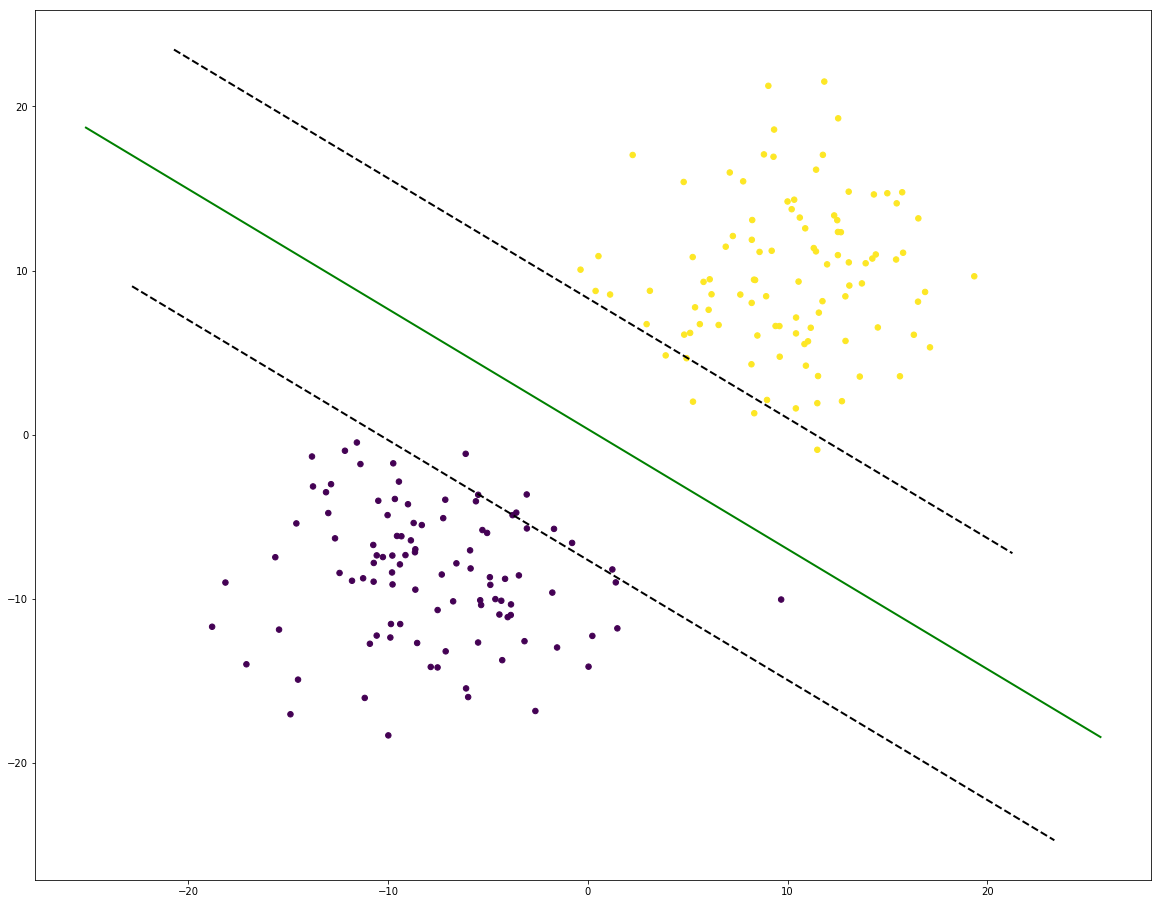

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import numpy as np


class HingeLossClassifier():
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def hinge_loss(self, X, y, w, b, c):
        """
        Compute Hinge Loss on Torch tensors
        torch.sum and x.clamp may com in usefull
     
        Args:
            X: torch.tensor shape n,d 
            y: torch.tensor shape n, 
            w: torch.tensor shape d,
            b: float
            c: float scaler for c ||w||^2 in loss
        Returns:
        hinge loss cost torch.tensor 1 x 1     
        """
        ### YOUR CODE HERE
        pred = X @ w + b
        loss = (1.0 - pred * y)
        loss = loss.clamp(min=0)
        # print('loss after', loss)
        out = torch.mean(loss)
        reg = c * torch.sum(w**2)
        out = out + reg
        ### END CODE
        return out

    def predict(self, X):
        """ Compute predictions on X (predictions in -1,+1)
        
        Args:
            X: torch.tensor shape n,d 
        """
        out = None
        ### YOUR CODE HERE
        out = torch.sign(X@self.w + b)
        ### END CODE
        return out
    
    def score(self, X, y):
        """ Compute accuracy of classifier on y
        
        Args:
            X: torch.tensor shape n,d 
            y: torch.tensor shape n, 
        """
        acc = None
        ### YOUR CODE HERE
        acc = (self.predict(X)==Y).mean()
        ### END CODE
        return acc
    
    def fit(self, X, y, c, epochs, lr):
        """ Gradient Descent Algorithm 
        
        Args:
            X: torch.tensor shape n,d 
            y: torch.tensor shape n, 
            c: float scaler for c ||w||^2 in loss
            epochs: int - number of iterations of gradient descent
            lr: float, learning rate for gradient descent
        """
        w = torch.zeros(X.shape[1], requires_grad=True)
        b = torch.zeros(1, 1, requires_grad=True)
        optimizer = optim.SGD([w, b], lr=lr)
        # remember to call optimizer.zero_grad
        ### YOUR CODE HERE
        for i in range(epochs):
            optimizer.zero_grad() # clears gradients otherwise they are accumulated
            loss = self.hinge_loss(X, y, w, b, c)
            loss.backward()
            acc = torch.sum(((X @ w + b) * y)>0)/len(y)
            print('round: {0}, loss: {1}, accuracy: {2}'.format(i, loss.item(), acc.item()))
            optimizer.step() # take a gradient step
        ### END CODE
        self.w = w.detach()
        self.b = b.detach()
        
hinge_data_torch = torch.from_numpy(hinge_data_numpy).float()
hinge_labels_torch = torch.from_numpy(hinge_labels_numpy).float()
w_test = torch.tensor([-1., -1], requires_grad=True)
b_test = torch.tensor([1.0], requires_grad=True)
c_test = 1.0

print('Check your computations from above')
cl = HingeLossClassifier()
loss = cl.hinge_loss(hinge_data_torch, hinge_labels_torch, w_test, b_test, c_test)
loss.backward()
print('check loss and gradient: ', loss.item(),'w grad: ', w_test.grad, 'b grad:', b_test.grad)

print('Run Gradient Descent')
cl.fit(hinge_data_torch, hinge_labels_torch, 1, 30, 0.1)
w = cl.w.numpy()
b = cl.b.numpy().ravel()[0]
print('Learned w and b', cl.w.numpy(), cl.b.numpy())

def plot_hyperplane(ax, w, b, *args, **kwargs): 
    xmin, xmax, ymin, ymax = ax.axis()
    
    if w[1]==0:
        # Vertical line
        print('vert')
        x = np.array((1 / w[0], 1 / w[0]))
        y = np.array((ymin, ymax))
    else:
        x = np.array((xmin, xmax))
        y = (-b -w[0] * x) / w[1]       
    # plot the line
    print(x, y)
    ax.plot(x, y, *args, **kwargs)


fig, ax = plt.subplots(1, 1, figsize=(20, 16))
ax.scatter(hinge_data_numpy[:,0], hinge_data_numpy[:, 1], c=hinge_labels_numpy, s=30)
margin = 1/np.linalg.norm(w)
plot_hyperplane(ax, w, b - 1,'k--', linewidth=2)
plot_hyperplane(ax, w, b + 1,'k--', linewidth=2)
plot_hyperplane(ax, w, b,'g-', linewidth=2)

plt.show()


## Ex 3: Kernel Perceptron 
In this exercise you must implement Kernel Perceptron for learning from a stream of data.
The learning algorithm will only do one pass over the data like in a system processing an input data stream.

The important part is how to actually add Kernels to the Perceptron learning algorithm.

First we need to represent the hyperplane in the feature space induced by the Kernel.
This must be implemented in the class *Representer* as described below.

Remeber the Perceptron algorithm, the current solution hyperplane is updated on a mispredicted data point $(x, y)$ as
$$
w = w + y x
$$
In this exercise the hyperplane exists in feature space and must be updated there but in the same way
with one difference. We include a learning rate $\alpha>0$ that scales the update.
The update that must be implemente  becomes
$$
w = w + \alpha y \phi(x)
$$
where $\phi$ is the feature transform corresponding to the used Kernel. As we will see we do not really need to know what $\phi$ is.

This means that the hyperplane solution is a linear combination of (transformed) inputs points and thus can be written as
$$
w = \sum_i \alpha_i \phi(x_i)
$$
and may be represented by storing the list of $\alpha_i$ and $x_i$. Note we have not discussed how to initialize $w$, which can be done just like an update. Also note that we do not use a bias variable in this exercise.


**Task:** In the class Representer implement 
* update(x, $\alpha$): (add point x with weight $\alpha$ to the hyperplane
* dot(z): compute and return 
$$
\langle w, \phi(z) \rangle = \langle \sum_i  \alpha_i \phi(x_i), \phi(z) \rangle = \sum_i \alpha_i K(x_i, z)
$$ 
(note the indexing here is not over the data set but the set of weight and points comprising w - and we assume the lists are non-empty)

After you have implemented the representation of the hyperplane you must implement
The Pereptron Classifier in the *KernelPerceptron* class.
* Implement the score function (compute accuracy of classifier on given data X with labels y)
* Implement the fit method - do one scan over the data and for each misprediction (x, y) update $w$ by adding $\alpha y \phi(x)$

Test your implementation by running the cell.

[ 1.  1.  1.  1.  1. -1.  1. -1.  1.  1.]
[[ 0.16752066 -0.43601185]
 [ 0.52223389  0.62242941]
 [ 0.82152053 -0.84957856]
 [ 0.16908947 -0.51818124]
 [ 0.91958226  0.14075682]]
In Sample Accuracy after one scan: 0.97


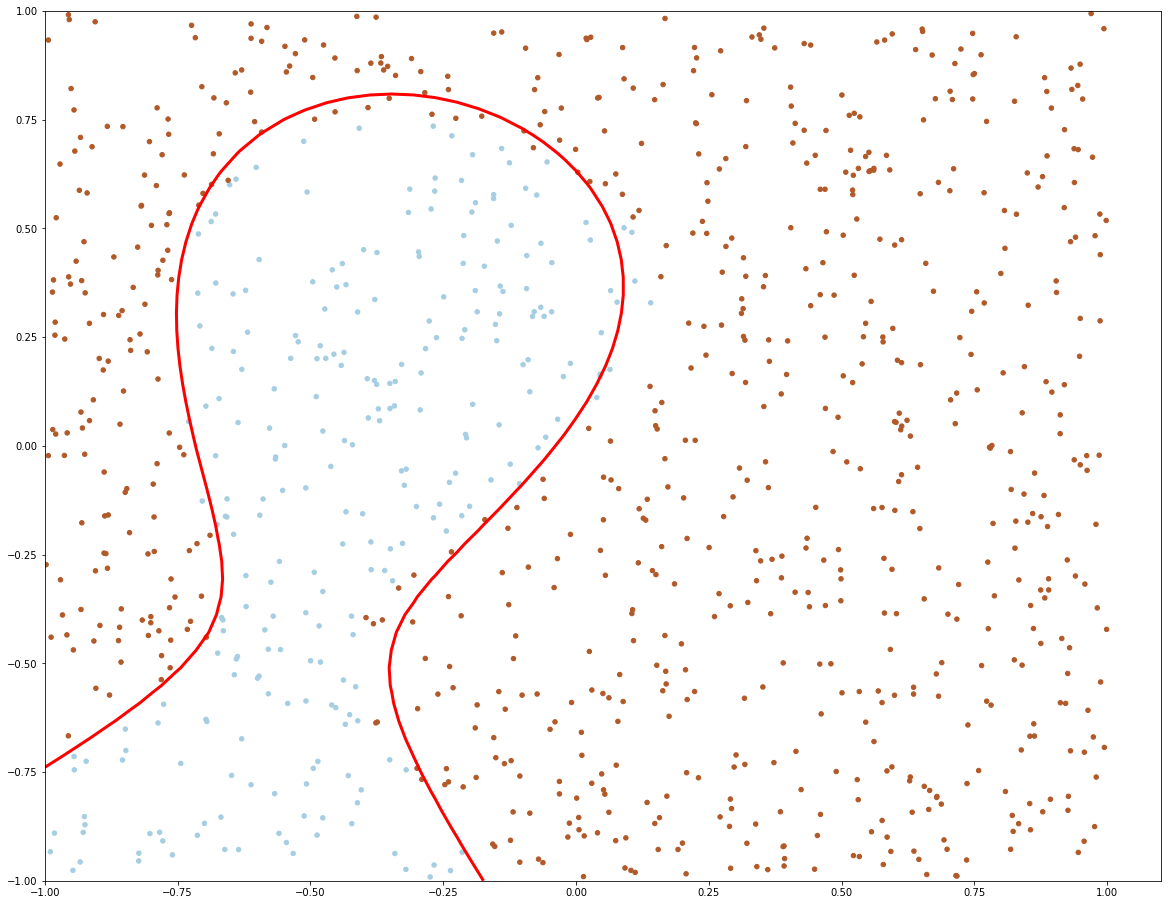

In [24]:
# streaming perceptron with kernels
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    """ Simple helper function for downloading and loading data """
    filename = 'nonlinear_data.npz'
    D = np.load(filename)
    return D

def visualize_kernel_perceptron(X, Y, w):
    """ Helper function for visualizing decision boundary in input space"""
    fig, ax = plt.subplots(figsize=(20, 16))
    ax.scatter(X[:, 0], X[:,1 ], c=Y, cmap=plt.cm.Paired, s=20)
    nsize = 50
    xs = ys = np.linspace(-1, 1, nsize)
    xm, ym = np.meshgrid(xs, ys)
    img = np.zeros((nsize, nsize)) # makes a 100 x 100 2d array
    for i, zy in enumerate(ys):
        for j, zx in enumerate(xs):    
            point = np.array([zx, zy])
            predict = w.dot(point)
            img[i, j] = predict
    ax.contour(xs, ys, img, [0], colors='r', linewidths=3)
    plt.show()

def get_rbf_kernel(gamma=1.0):
    assert gamma > 0, 'Gamma must be positive'
    def K(x, z):
        return np.exp((-gamma * np.sum((x-z)**2)))
    return K

class Representer():
    """ Represents a hyperplane H in Feature space that is a linear combination of transformed points from input space
        
        The class can evaluate an input in the original input space mapped to H against the hyperplane        
    """
    def __init__(self, K):
        self.dat = list()
        self.alpha = list()
        self.K = K

    def update(self, x, a):
        """ Update hyperplane Representer by point x with weight a i.e. w = w + a * x
        
        Args:
            x: np.array - data point
            a: float - data weight
        """
        ### YOUR CODE HERE
        self.dat.append(x.reshape(1, -1))
        self.alpha.append(a)
        ### END CODE

    def dot(self, z):
        """ compute inner product between hyperplane and z in feature (kernel) space
        i.e. <phi(w), phi(z)>
        
        Args:
            z: np.array
        """
        ### YOUR CODE HERE
        out =  np.sum([a*self.K(z.reshape(1, -1), x) for (x, a) in zip(self.dat, self.alpha)])
        ### END CODE
        return out
    
class KernelPerceptron():
    
    def __init__(self, K):
        self.K = K
        self.w = None
    
    def fit(self, X, Y, K, alpha=0.1):
        """ Kernel Perceptron Algorithm 
            1. Do one pass over the data - for each misprediction add phi(x) with weight y * alpha to hyperplane representation
            
        """
        w = Representer(self.K)
        ### YOUR CODE HERE
        d = X.shape[1]
        # start_w = np.zeros(d)
        # w.update(start_w, 1)
        n = len(Y)
        for i in range(n):
            x = X[i, :]
            y = Y[i]
            if w.dot(x) * y <= 0:
                w.update(x, y * alpha)                    
        self.w = w
        ### END CODE
        
    def score(self, X, Y):
        """ Compute Classifier Accuracy
        Args:
          X: np.array n, d
          Y: np.array n, 
        
        Returns:
        out: scalar - accuracy of model on data X with labels Y
        """
        out = None
        ### YOUR CODE HERE
        pred = np.sign(np.array([self.w.dot(x) for x in X]))
        out = (pred == Y).mean()
        ### END CODE
        return out
            
    

D = load_data()
X = D['X4']
Y = D['y4']
rbf_kernel = get_rbf_kernel(1.0)
kernel_perceptron_classifier = KernelPerceptron(rbf_kernel)
kernel_perceptron_classifier.fit(X, Y, rbf_kernel)
print('In Sample Accuracy after one scan: {0}'.format(kernel_perceptron_classifier.score(X, Y)))
visualize_kernel_perceptron(X, Y, kernel_perceptron_classifier.w)


## Ex 4: Deep Learning with Pytorch 

We have seen all the tools needed to do deep learning. In this exercise we will compare small convolutional neural nets to feed forward networks on a more trying data set of images, known as CIFAR 10. 
We have shown some example data from CIFAR 10 in the next cell. Remember to set your own data path.
In the cell after this we show how use the neural net package from pytorch to construct neural networks, including convolutional neural nets.

Your task is to make a standard feed forward network and a convolutional neural network and compare them on CIFAR data.
We will only train for a few epochs because these networks are quite computational expensive.

We have written all the code for getting the data and fitting the network. All you need to do is implement a standard feed forward network and a convolutinal network and compare them.

See **conv_cifar.py** for starter code



Files already downloaded and verified
Files already downloaded and verified
data shape torch.Size([3, 32, 32])
data type <class 'torch.Tensor'>


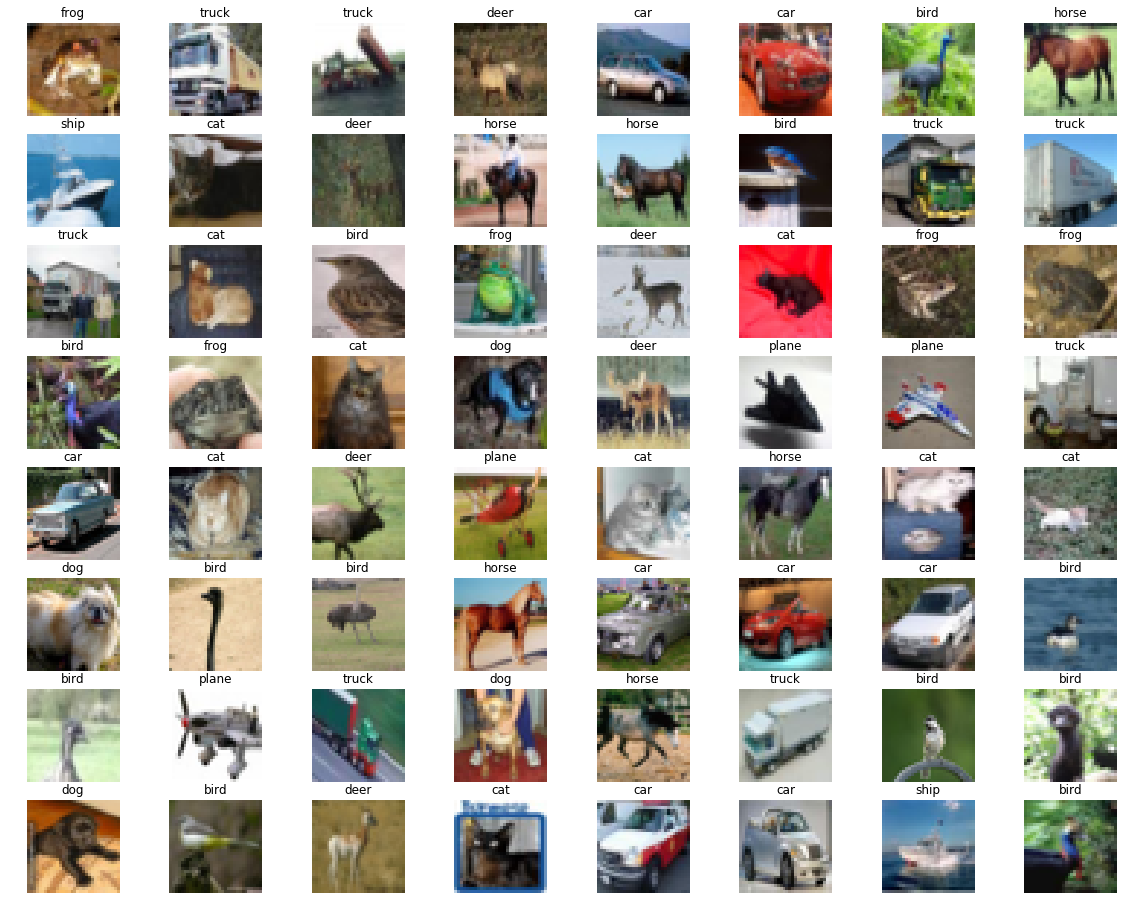

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision
import torchvision.transforms as transforms



## LOAD DATA
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


data_path = './torch_data/'
### YOUR CODE HERE
data_path = '/Users/jallan/torch_data'
### END CODE
#set your own data path
_trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
_train_loader = torch.utils.data.DataLoader(_trainset, batch_size=32,
                                          shuffle=True, num_workers=4)

_testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
_test_loader = torch.utils.data.DataLoader(_testset, batch_size=32,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


print('data shape', _trainset[0][0].shape)
print('data type', type(_trainset[0][0]))

fig, axes = plt.subplots(8, 8, figsize=(20,16))
for i, ax in enumerate(axes.ravel()):
    tmp = (_trainset[i][0].permute(1, 2, 0)+1)/2
    ax.imshow(tmp)
    ax.axis('off')
    data_class = classes[_trainset[i][1]]
    ax.set_title(data_class)
plt.show()


In [ ]:
## A Convolutional Neural Net Class
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, kernel_size=3, padding=1) #conv operator from 3 channels to 5 with 3x3 filters withh padding (image size unchanged)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 7, kernel_size=3, padding=1) #conv operator from 5 channels to 7 with 3x3 filters withh padding (image size unchanged)
        self.fc = nn.Linear(8 * 8 * 7 , 10) # standard linear layer with 10 outputs for softmax

    def forward(self, dat):
        """ Implement the forward pass
            
            Args:
            dat: torch.tensor shape (mini_batch_size, channels, width, height) which is (-1, 3, 32, 32)
            
            return x, torch.tensor shape (mini_batch_size, output_size)
        """
        x = F.relu(self.conv1(dat)) # apply conv operator and then relu on top
        x = self.pool(x) # apply pooling operator
        x = F.dropout(x, p=0.5) # apply dropout - for the fun of it
        x = F.relu(self.conv2(x)) # apply another round of convolutions and relu
        x = self.pool(x) # pool again
        x = x.view(-1, 8 * 8 * 7) # a reshape operation that flattens the remaing image into a vector
        x = self.fc(x) # apply feed forward layer 
        return x


conv_net = ConvNet()
conv_net(_trainset[0][0].reshape(1,3,32,32))

def test_accuracy(neural_net, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            outputs = neural_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    acc = 100.0 * correct/total
    return acc


def fit(net, train_loader, test_loader, epochs=5):
    criterion = nn.CrossEntropyLoss() # The negative log likelihood loss
    lr = 0.1
    optimizer = optim.SGD(net.parameters(), lr=lr)    
    for epoch in range(epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_total = 0.0
        for i, data in enumerate(train_loader):
            # get the inputs
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward 
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            # backward step
            loss.backward()
            # update parameters
            optimizer.step()

            # print running statistics
            running_loss += loss.item()
            running_total += labels.size(0)
            if i % 200 == 199:    # print every 200 mini-batches
                print(f'Epoch {epoch + 1}, minibatch {i + 1}, mean running loss {running_loss/running_total}')
        print(f'epoch {epoch+1} done')
        train_acc = test_accuracy(net, train_loader)
        test_acc = test_accuracy(net, test_loader)
        print('train accuracy:', train_acc)
        print('test accuracy:', test_acc)
    
    print('Finished Training')
fit(conv_net, _train_loader, _test_loader, epochs=1)

# Exercise 5: Determining whether PCA is useful / relevant for a given dataset
  
In Principal Components Analysis assume we have computed the variances (eigenvalues of the empirical covariance matrix), $\lambda_1,\dots,\lambda_d>0$.

Define $\bar{\lambda} = \frac{1}{d} \sum_{i=1}^d \lambda_i$, the mean of the variances (eigenvalues).
Now consider the following usefulness measure of PCA:
    
$$
score = \sum_{i=1}^d (\lambda_i - \bar{\lambda})^2
$$
    
Discuss whether $score$ could be used as a measure of whether performing a PCA would be useful. What is $score$ and what does it mean for it to be zero and what would it mean if it is large?